<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/AIML_2024/blob/main/(lab_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/breast_cancer_survival.csv")
df.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [ ]:
column_names = list(df.columns)

# Print each column name
for column in column_names:
    print(column)

Age
Gender
Protein1
Protein2
Protein3
Protein4
Tumour_Stage
Histology
ER status
PR status
HER2 status
Surgery_type
Date_of_Surgery
Date_of_Last_Visit
Patient_Status


In [ ]:
df['Patient_Status'].replace({'Dead': 0, 'Alive': 1}, inplace=True)
df['ER status'].replace({'Positive': 0, 'Negative': 1}, inplace=True)
df['PR status'].replace({'Positive': 0, 'Negative': 1}, inplace=True)
df['HER2 status'].replace({'Positive': 0, 'Negative': 1}, inplace=True)
df['Gender'].replace({'FEMALE': 0, 'MALE': 1}, inplace=True)
df['Tumour_Stage'].replace({'I': 1, 'II': 2,'III':3}, inplace=True)
df.drop(columns=['Date_of_Last_Visit','Date_of_Surgery','Histology','Surgery_type'], inplace=True)
X=df.drop(columns=['Patient_Status'],axis=1)
y=df['Patient_Status']
print(df)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     ER status  PR status  HER2 status  Patient_Status  
0            0          0            1             1.0

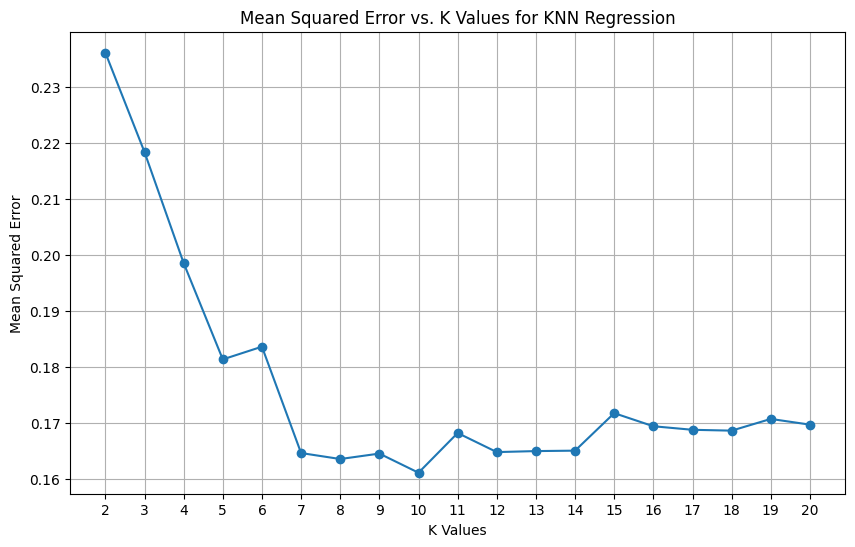

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'X' contains your feature data and 'y' contains the corresponding continuous values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Define the range of k values to test
k_values = range(2, 21)
mse_values = []

for k in k_values:
    # Train the KNN regressor model for each k value
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train_normalized, y_train)

    # Predict on the test set
    y_pred = knn_regressor.predict(X_test_normalized)

    # Calculate mean squared error and store it
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o')
plt.xlabel('K Values')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. K Values for KNN Regression')
plt.xticks(k_values)
plt.grid(True)
plt.show()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Assuming 'X' contains your feature data and 'y' contains the corresponding continuous values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Calculate evaluation metric (mean squared error)
mse_dt = mean_squared_error(y_test, y_pred_dt)

print("Decision Tree Regressor Metrics:")
print(f"Mean Squared Error: {mse_dt}")


Decision Tree Regressor Metrics:
Mean Squared Error: 0.2669359117592229


In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer

# Assuming 'X' contains your feature data and 'y' contains the corresponding continuous values
# Convert 'y' to a numpy array and reshape it
y_array = np.array(y)
y_reshaped = y_array.reshape(-1, 1)

# Convert continuous labels to discrete classes using KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
y_discrete = discretizer.fit_transform(y_reshaped).reshape(-1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_discrete, test_size=0.2, random_state=42)

# Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_classifier.predict(X_test)

# Calculate evaluation metrics for KNN classifier
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_score_knn = f1_score(y_test, y_pred_knn, average='weighted')

print("KNN Classifier Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-Score: {f1_score_knn}")

# Train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Calculate evaluation metrics for Decision Tree classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_score_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("\nDecision Tree Classifier Metrics:")
print(f"Accuracy: {accuracy_dt}")
print(f"Precision: {precision_dt}")
print(f"Recall: {recall_dt}")
print(f"F1-Score: {f1_score_dt}")


KNN Classifier Metrics:
Accuracy: 0.8059701492537313
Precision: 0.6716417910447762
Recall: 0.8059701492537313
F1-Score: 0.7327001356852103

Decision Tree Classifier Metrics:
Accuracy: 0.6716417910447762
Precision: 0.691595928712234
Recall: 0.6716417910447762
F1-Score: 0.681230599141047


In [ ]:
print("\nComparison of KNN Classifier and Decision Tree Classifier:")
print("Metrics\t\t\tKNN Classifier\t\tDecision Tree Classifier")
print(f"Accuracy\t\t{accuracy_knn:.4f}\t\t\t{accuracy_dt:.4f}")
print(f"Precision\t\t{precision_knn:.4f}\t\t\t{precision_dt:.4f}")
print(f"Recall\t\t\t{recall_knn:.4f}\t\t\t{recall_dt:.4f}")
print(f"F1-Score\t\t{f1_score_knn:.4f}\t\t\t{f1_score_dt:.4f}")



Comparison of KNN Classifier and Decision Tree Classifier:
Metrics			KNN Classifier		Decision Tree Classifier
Accuracy		0.8060			0.6716
Precision		0.6716			0.6916
Recall			0.8060			0.6716
F1-Score		0.7327			0.6812
